In [1]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df=pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info

<bound method DataFrame.info of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [4]:
df.shape

(214, 10)

In [5]:
df.describe

<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [6]:
x=df.iloc[:,:9]
y=df.iloc[:,-1]

In [7]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [9]:
model = KNeighborsClassifier(n_neighbors = 1)

In [10]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [11]:
kfold=KFold(n_splits=27)
result=cross_val_score(model,x,y,cv=kfold)

In [12]:
result

array([0.375     , 0.875     , 0.5       , 0.75      , 0.75      ,
       0.75      , 0.375     , 0.625     , 1.        , 0.875     ,
       0.75      , 0.5       , 0.625     , 0.625     , 1.        ,
       0.625     , 0.75      , 0.625     , 0.        , 0.375     ,
       0.625     , 0.75      , 0.        , 0.25      , 1.        ,
       0.85714286, 1.        ])

In [13]:
result.mean()

0.6382275132275133

In [14]:
model.predict([[1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0]])

C:\AN\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Grid search cv for Algorithm Tuning

In [15]:
n_neighbors=list(range(1,20))
parameters={'n_neighbors': n_neighbors}

In [16]:
model=KNeighborsClassifier()

In [17]:
grid=GridSearchCV(estimator=model,param_grid=parameters)

In [18]:
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]})

In [19]:
print(grid.best_score_)

0.640531561461794


In [20]:
print(grid.best_params_)

{'n_neighbors': 1}


# visualizing the cv results

In [21]:
k_range = range(1, 20)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=5)
    k_scores.append(scores.mean())

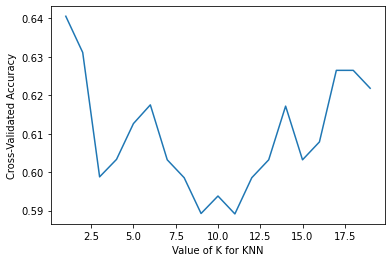

In [22]:
#plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.ylim(0.73,0.76)
plt.show()

In [23]:
k_scores

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963]

In [24]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,20),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
2,3,0.598782
3,4,0.603322
4,5,0.612625
5,6,0.617497
6,7,0.603212
7,8,0.598560
8,9,0.589258
9,10,0.593798


In [25]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,0.640532
1,2,0.631118
17,18,0.626467
16,17,0.626467
18,19,0.621816
5,6,0.617497
13,14,0.617165
4,5,0.612625
15,16,0.607863
3,4,0.603322
